# KOA Table

In [1]:
%matplotlib notebook

In [2]:
# import
import pandas
import numpy as np

from matplotlib import pyplot as plt

from astropy.table import Table

# Load

In [3]:
all_qsos = pandas.read_fwf('qso_results.txt')

In [4]:
all_qsos.head(1)

,name,nires,mosfire,nirspec,esi,deimos,hires
0,J134208.110p092838.610,0,0,0,0,0,0


# Sum

In [5]:
all_qsos['total'] = all_qsos['nires'] + all_qsos['mosfire'] + all_qsos['nirspec'] + all_qsos['esi'] + all_qsos['deimos'] + all_qsos['hires']

In [6]:
all_qsos['total']

0       0
1       0
2       0
3       0
4       0
       ..
1128    0
1129    0
1130    0
1131    0
1132    0
Name: total, Length: 1133, dtype: int64

# Cut

In [7]:
obs_qsos = all_qsos[all_qsos['total']>0]

In [8]:
len(obs_qsos)

194

In [9]:
obs_qsos['logN'] = np.log10(obs_qsos['total'])

/home/xavier/Projects/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


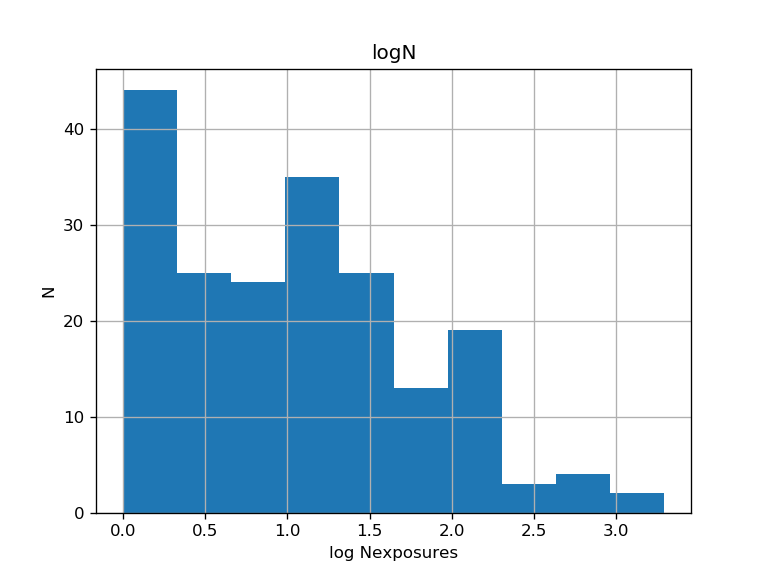

In [10]:
ax = obs_qsos.hist(column='logN')[0]
#ax[0].set_xscale("log")#, nonposy='clip')
ax[0].set_xlabel('log Nexposures')
ax[0].set_ylabel('N')
plt.show()

In [11]:
for key in obs_qsos.keys():
    if key in ['name', 'logN']:
        continue
    print("Instru: {}   N={}".format(key, np.sum(obs_qsos[key])))

Instru: nires   N=723
Instru: mosfire   N=838
Instru: nirspec   N=8190
Instru: esi   N=1086
Instru: deimos   N=205
Instru: hires   N=763
Instru: total   N=11805


# More stats

In [12]:
qsos = Table.read('qso_rsg4p5_v2.0_all_For_JXP_20200609.fits')

In [13]:
qsos[-1]

JName,RA,DEC,Name,Ref,Redshift,Spec_Notes,NIR_Notes,NIRSpec_Ref
,hms,dms,,,,,,
bytes22,bytes12,bytes13,bytes25,bytes35,float32,bytes28,bytes22,bytes27
J140149.960p514310.300,14:01:49.96,+51:43:10.3,J140149.960p514310.300,McGreer18,4.2,None,None,None


In [14]:
len(qsos), len(all_qsos)

(1133, 1133)

In [15]:
assert qsos['JName'][0] == all_qsos['name'][0]

## Loop on redshifts

### Exposures

In [16]:
zmin = 0.
iobs = all_qsos['total'] > 0
for zmax in [5., 6., 8.]:
    zidx = (qsos['Redshift'] > zmin) & (qsos['Redshift'] <= zmax)
    print('z_min,z_max = {},{}'.format(zmin,zmax))
    # Observed
    cut = zidx & iobs
    for key in all_qsos.keys():
        if key in ['name', 'logN']:
            continue
        print("Instru: {}   N_exp={}".format(key, np.sum(all_qsos[key][cut])))
    zmin = zmax
    print("")

z_min,z_max = 0.0,5.0
Instru: nires   N_exp=8
Instru: mosfire   N_exp=434
Instru: nirspec   N_exp=1348
Instru: esi   N_exp=301
Instru: deimos   N_exp=23
Instru: hires   N_exp=241
Instru: total   N_exp=2355

z_min,z_max = 5.0,6.0
Instru: nires   N_exp=0
Instru: mosfire   N_exp=106
Instru: nirspec   N_exp=4106
Instru: esi   N_exp=375
Instru: deimos   N_exp=83
Instru: hires   N_exp=379
Instru: total   N_exp=5049

z_min,z_max = 6.0,8.0
Instru: nires   N_exp=715
Instru: mosfire   N_exp=298
Instru: nirspec   N_exp=2736
Instru: esi   N_exp=410
Instru: deimos   N_exp=99
Instru: hires   N_exp=143
Instru: total   N_exp=4401



### QSOs

In [17]:
zmin = 0.
iobs = all_qsos['total'] > 0
for zmax in [5., 6., 8.]:
    zidx = (qsos['Redshift'] > zmin) & (qsos['Redshift'] <= zmax)
    print('z_min,z_max = {},{}'.format(zmin,zmax))
    # Observed
    cut = zidx & iobs
    for key in all_qsos.keys():
        if key in ['name', 'logN']:
            continue
        iqso = all_qsos[key][cut] > 0
        print("Instru: {}   N_qso={}".format(key, np.sum(iqso)))
    zmin = zmax
    print("")

z_min,z_max = 0.0,5.0
Instru: nires   N_qso=1
Instru: mosfire   N_qso=2
Instru: nirspec   N_qso=24
Instru: esi   N_qso=65
Instru: deimos   N_qso=5
Instru: hires   N_qso=24
Instru: total   N_qso=79

z_min,z_max = 5.0,6.0
Instru: nires   N_qso=0
Instru: mosfire   N_qso=2
Instru: nirspec   N_qso=16
Instru: esi   N_qso=50
Instru: deimos   N_qso=7
Instru: hires   N_qso=24
Instru: total   N_qso=63

z_min,z_max = 6.0,8.0
Instru: nires   N_qso=13
Instru: mosfire   N_qso=13
Instru: nirspec   N_qso=15
Instru: esi   N_qso=27
Instru: deimos   N_qso=15
Instru: hires   N_qso=8
Instru: total   N_qso=52



## Unique qsos

In [21]:
zmin = 0.
iobs = all_qsos['total'] > 0
for zmax in [5., 6., 6.5, 7., 8.]:
    zidx = (qsos['Redshift'] > zmin) & (qsos['Redshift'] <= zmax)
    print('z_min,z_max = {},{}'.format(zmin,zmax))
    # Observed
    cut = zidx & iobs
    print('N_unique = {}'.format(np.sum(cut)))
    #for key in all_qsos.keys():
    #    if key in ['name', 'logN']:
    #        continue
    #    iqso = all_qsos[key][cut] > 0
    #    print("Instru: {}   N_qso={}".format(key, np.sum(iqso)))
    zmin = zmax
    print("")

z_min,z_max = 0.0,5.0
N_unique = 79

z_min,z_max = 5.0,6.0
N_unique = 63

z_min,z_max = 6.0,6.5
N_unique = 39

z_min,z_max = 6.5,7.0
N_unique = 13

z_min,z_max = 7.0,8.0
N_unique = 0



In [1]:
39+13

52